In [1]:
print("Hello, World!")

Hello, World!


### Objective 1: Data Prep & QA
* Read in the Airbnb listings Data (use low_memory=False and encoding="ISO-8859-1" in read_csv)
* Cast any date columns as a datetime format
* Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
* QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field 

In [2]:
# Importing Imp. Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing data with we'll work!
Listings = pd.read_csv(
    fr"C:\Users\Shiva\OneDrive\Documents\Project\Python Project\Airbnb Data\Listings.csv", 
    encoding="ISO-8859-1", 
    low_memory=False,
    parse_dates=['host_since']
)

#### Exploration of the Listings Dataset

In [4]:
Listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
Listings.shape

(279712, 33)

In [6]:
Listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

> * Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [7]:
paris_listings = (
    Listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


> * QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field.

In [8]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [9]:
paris_listings.query("host_since.isna()")

paris_listings.dropna(inplace=True)

In [10]:
paris_listings.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [11]:
paris_listings[['accommodates', 'price']].describe()

,accommodates,price
count,64657.000000,64657.000000
mean,3.037877,113.104614
std,1.588382,214.479626
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [12]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [13]:
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [14]:
paris_listings.query("accommodates == 0 & price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [15]:
paris_listings.nunique()

host_since       3854
neighbourhood      20
city                1
accommodates       17
price             801
dtype: int64

In [16]:
paris_listings.neighbourhood.value_counts().head(10)

neighbourhood
Buttes-Montmartre      7232
Popincourt             6199
Vaugirard              4825
Enclos-St-Laurent      4623
Batignolles-Monceau    4329
Menilmontant           3754
Buttes-Chaumont        3728
Passy                  3213
Opera                  3155
Temple                 2942
Name: count, dtype: int64

In [17]:
paris_listings.accommodates.value_counts().head(10)

accommodates
2     31701
4     15798
3      6195
6      3499
1      3243
5      2481
8       713
7       470
10      201
9        90
Name: count, dtype: int64

In [18]:
paris_listings.price.value_counts().head(10)

price
60     3059
70     2931
80     2914
50     2834
100    2524
90     2282
65     1890
75     1826
40     1618
55     1610
Name: count, dtype: int64

### Obective 2: Data Analysis


* Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [19]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price" : "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.911561
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.222069
Reuilly,89.058402
Popincourt,90.518955


In [20]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.891525
Passy,161.190476
Louvre,175.379972
Elysee,210.536765


* Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [21]:
paris_listings_accommodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")
)

paris_listings_accommodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


* Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [22]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


### OBJECTIVE 3: Visualize the data and summarize findings.
* Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

* Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

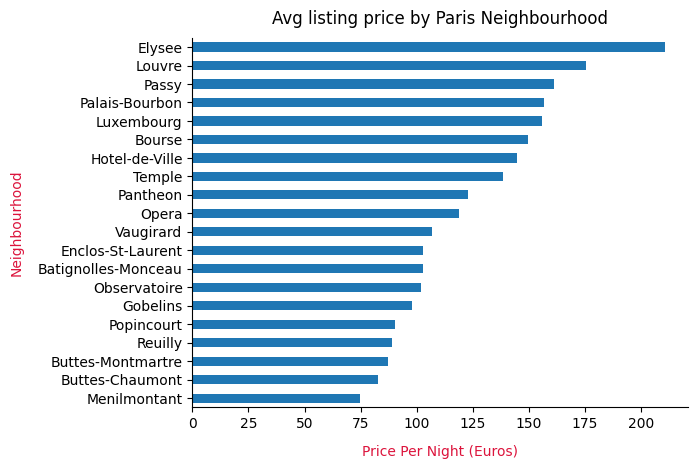

In [23]:
paris_listings_neighbourhood.plot(kind='barh', legend=False)

plt.title("Avg listing price by Paris Neighbourhood", pad=10),
plt.xlabel("Price Per Night (Euros)", labelpad=10, c="crimson"),
plt.ylabel("Neighbourhood", labelpad=10, c="crimson"),

sns.despine()

* Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

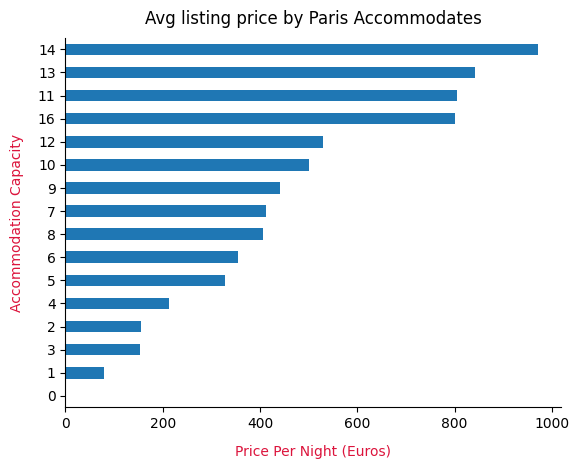

In [24]:
paris_listings_accommodations.plot(kind='barh', legend=False)

plt.title("Avg listing price by Paris Accommodates", pad=10),
plt.xlabel("Price Per Night (Euros)", labelpad=10, c="crimson"),
plt.ylabel("Accommodation Capacity", labelpad=10, c="crimson"),

sns.despine()

* Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

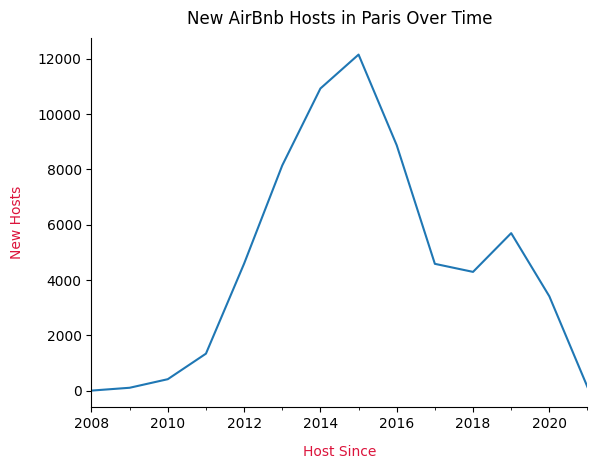

In [25]:
paris_listings_over_time['neighbourhood'].plot(kind='line')

plt.title("New AirBnb Hosts in Paris Over Time", pad=10)
plt.xlabel("Host Since", labelpad=10, c='crimson')
plt.ylabel("New Hosts", labelpad=10, c='crimson')

sns.despine()

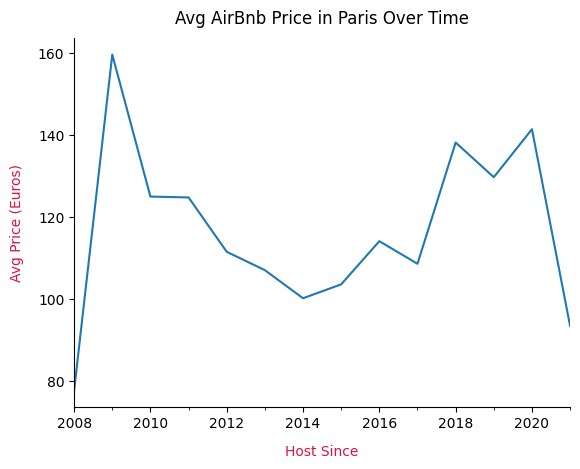

In [26]:
paris_listings_over_time['price'].plot(kind='line')

plt.title("Avg AirBnb Price in Paris Over Time", pad=10)
plt.xlabel("Host Since", labelpad=10, c='crimson')
plt.ylabel("Avg Price (Euros)", labelpad=10, c='crimson')

sns.despine()

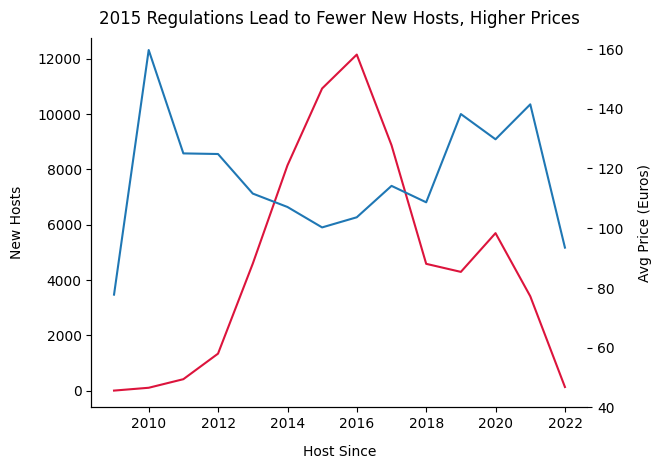

In [27]:
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    c='crimson'
)

ax.set_xlabel("Host Since", labelpad=10)
ax.set_ylabel("New Hosts", labelpad=10)


ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price']
)

ax2.set_ylim(40)
ax2.set_ylabel("Avg Price (Euros)", labelpad=10)
ax2.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices", pad=10)


sns.despine()